<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

### <span style="color:Black"> Term1&2 - Exploratory Data Analysis - NYC Flight Data
###  <span style="color:DarkGreen"> - *by Sai Ram Julakanti*

## Table of Contents
- 1. [Problem Statement](#section1)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
- 4. [Pre Processing](#section4)</br>
- 5. [Analysis](#section5)</br>
- 6. [Conclusions](#section6)</br>
- 7. [Actionable Insights](#section7)</br>

<a id=section1></a> 
### 1. Problem Statement

After Successfull completion of Term 1&2 training, as a part of project work the below dataset has been considered for EDA.

- __Name__:        "NYC Flight Data"
- __Description__: This dataset includes Airport and airline on-time data for all flights departing NYC in 2013 which also includes Flight   details, dates, origin, Destination, travel time etc.

- __Source__:      https://github.com/insaid2018/Term-1/blob/master/Data/Projects/NYC_Flight_Data.rar

<a id=section2></a> 
### 2. Load the Packages and data

In [2]:
!pip install pandas-profiling --upgrade

import sys                                                                   # Import packages
import pandas as pd
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 

import warnings                                                              
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                    
                                                                         

NYC_Flight = pd.read_csv('NYC_Flight_Data.csv')                         # Load in the dataset as NYC_Flight

Requirement already up-to-date: pandas-profiling in c:\users\ukx6205\appdata\local\continuum\anaconda3\lib\site-packages (2.8.0)


<a id=section3></a> 
### 3. Data Profiling

In [2]:
NYC_Flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00


In [3]:
NYC_Flight.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [4]:
NYC_Flight.describe(include = 'all')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776,336776.000000,334264,336776,336776,327346.000000,336776.000000,336776.000000,336776.000000,336776
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,4043,3,105,NaN,NaN,NaN,NaN,6936
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UA,NaN,N725MQ,EWR,ORD,NaN,NaN,NaN,NaN,20-09-2013 08:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58665,NaN,575,120835,17283,NaN,NaN,NaN,NaN,94
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,NaN,1971.923620,NaN,NaN,NaN,150.686460,1039.912604,13.180247,26.230100,NaN
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,NaN,1632.471938,NaN,NaN,NaN,93.688305,733.233033,4.661316,19.300846,NaN
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,NaN,1.000000,NaN,NaN,NaN,20.000000,17.000000,1.000000,0.000000,NaN
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,NaN,553.000000,NaN,NaN,NaN,82.000000,502.000000,9.000000,8.000000,NaN
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,NaN,1496.000000,NaN,NaN,NaN,129.000000,872.000000,13.000000,29.000000,NaN
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,NaN,3465.000000,NaN,NaN,NaN,192.000000,1389.000000,17.000000,44.000000,NaN


In [5]:
pre_profiling = pandas_profiling.ProfileReport(NYC_Flight)
pre_profiling.to_file("NYC_Flight_pre_profiling.html")  

In [6]:
pd.unique(NYC_Flight.origin)

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [7]:
pd.unique(NYC_Flight.dest)

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

### Initial Observations:
     - Data from 2013.
     - 16 unique Carriers.
     - 3 Origins from NYC & 105 destinations across world.
     - Departure & Arrival timing details are missing for few.
     - Month need to be converted to showcase better.
     - can sense the positive skewness in Dep Delay & Arrival Delay time.
     - Flight speed may be used for analysis, so planning to include new field.

<a id=section4></a> 
### 4. Pre processing
    - New Field month name is added 

In [8]:
month_name_dict={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
NYC_Flight['month_name'] = NYC_Flight['month'].apply(lambda m: month_name_dict[m])
NYC_Flight.tail()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,month_name
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,30-09-2013 14:00,Sep
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,30-09-2013 22:00,Sep
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,30-09-2013 12:00,Sep
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,30-09-2013 11:00,Sep
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,30-09-2013 08:00,Sep


    - Missing values are found in Departure & Arrival timing fields which are around 2.5%, so dropping these rows. 
    - As this data is related to 2013 alone, removed year column as have 1 distinct Value

In [9]:
NYC_Flight_data = NYC_Flight.dropna() 
NYC_Flight_data.drop('year',axis=1,inplace=True)

- New Field speed is added

In [10]:
Flight_speed = NYC_Flight_data['distance'] / (NYC_Flight_data['air_time']/60)
NYC_Flight_data['speed'] = Flight_speed
NYC_Flight_data.head()

,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,month_name,speed
0,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,1/1/2013 5:00,Jan,370.044053
1,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,1/1/2013 5:00,Jan,374.273128
2,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,1/1/2013 5:00,Jan,408.375000
3,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,1/1/2013 5:00,Jan,516.721311
4,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,1/1/2013 6:00,Jan,394.137931


In [11]:
NYC_Flight_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   month           327346 non-null  int64  
 1   day             327346 non-null  int64  
 2   dep_time        327346 non-null  float64
 3   sched_dep_time  327346 non-null  int64  
 4   dep_delay       327346 non-null  float64
 5   arr_time        327346 non-null  float64
 6   sched_arr_time  327346 non-null  int64  
 7   arr_delay       327346 non-null  float64
 8   carrier         327346 non-null  object 
 9   flight          327346 non-null  int64  
 10  tailnum         327346 non-null  object 
 11  origin          327346 non-null  object 
 12  dest            327346 non-null  object 
 13  air_time        327346 non-null  float64
 14  distance        327346 non-null  int64  
 15  hour            327346 non-null  int64  
 16  minute          327346 non-null  int64  
 17  time_hour 

<a id=section5></a> 
### 5. Analysis

<span style="color:DarkGreen"> - <div align="center"> **Frequency distribution of flights from Origin**

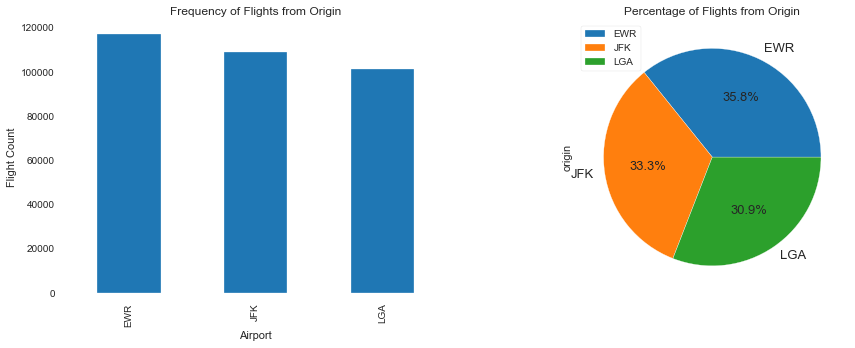

In [12]:
f,ax=plt.subplots(1,2,figsize=(15,5))

NYC_Flight_data['origin'].value_counts().plot(kind='bar',fontsize=10,ax=ax[0])
ax[0].set_title('Frequency of Flights from Origin')
ax[0].set_xlabel('Airport')
ax[0].set_ylabel('Flight Count')

NYC_Flight_data['origin'].value_counts().plot(kind='pie',autopct='%2.1f%%',ax=ax[1],fontsize=13)
ax[1].set_title('Percentage of Flights from Origin')
plt.legend() 

plt.show()

 - <span style="color:DarkGreen"> **EWR airport having highest departures followed by JFK & LGA**

<span style="color:DarkGreen"> - <div align="center"> **Frequency distribution of Carriers**

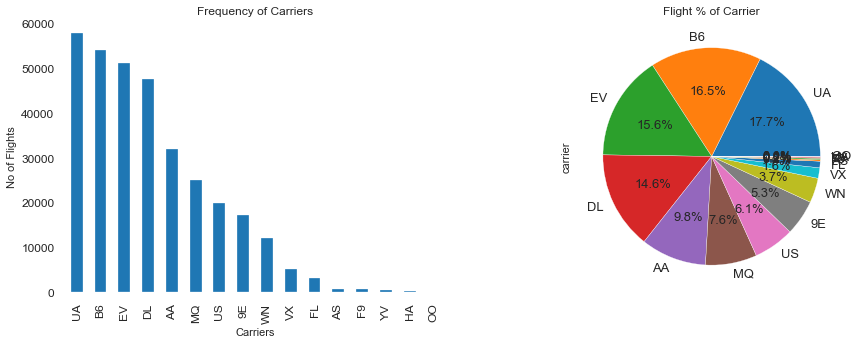

In [13]:
f,ax=plt.subplots(1,2,figsize=(15,5))

NYC_Flight_data['carrier'].value_counts().plot(kind='bar',fontsize=12,ax=ax[0])
ax[0].set_title('Frequency of Carriers')
ax[0].set_xlabel('Carriers')
ax[0].set_ylabel('No of Flights')

NYC_Flight_data['carrier'].value_counts().plot(kind='pie',autopct='%2.1f%%',ax=ax[1],fontsize=13)
ax[1].set_title('Flight % of Carrier')

plt.show()

 - <span style="color:DarkGreen"> **Carriers UA,B6,EV & DL hold 60% of travels and UA stood in the top**

<span style="color:DarkGreen"> - <div align="center"> **Top 15 Destinations from NYC**

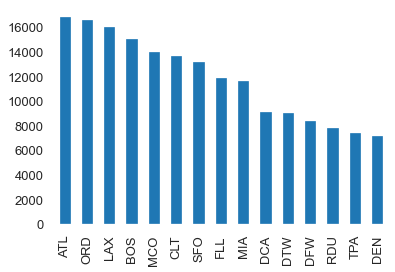

In [14]:
dest_sorted = NYC_Flight_data['dest'].value_counts().sort_values(ascending=False)
dest_sorted.head(15).plot(kind='bar',fontsize=13)

 - <span style="color:DarkGreen"> **Above mentioned are the top 15 travel destination from NYC airports**

<span style="color:DarkGreen"> - <div align="center"> **Month wise travel data**

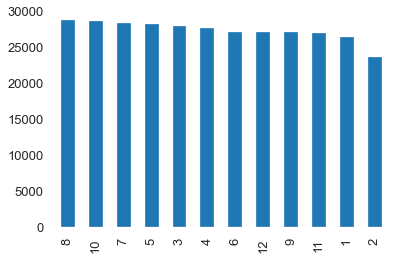

In [15]:
month_data = NYC_Flight_data['month'].value_counts().sort_values(ascending=False)
month_data.plot(kind='bar',fontsize=13)

- <span style="color:DarkGreen"> **Feb month having less travels when compared to other months**

<span style="color:DarkGreen"> - <div align="center"> **Avg Departure & Arrival Delay on Monthly basis**

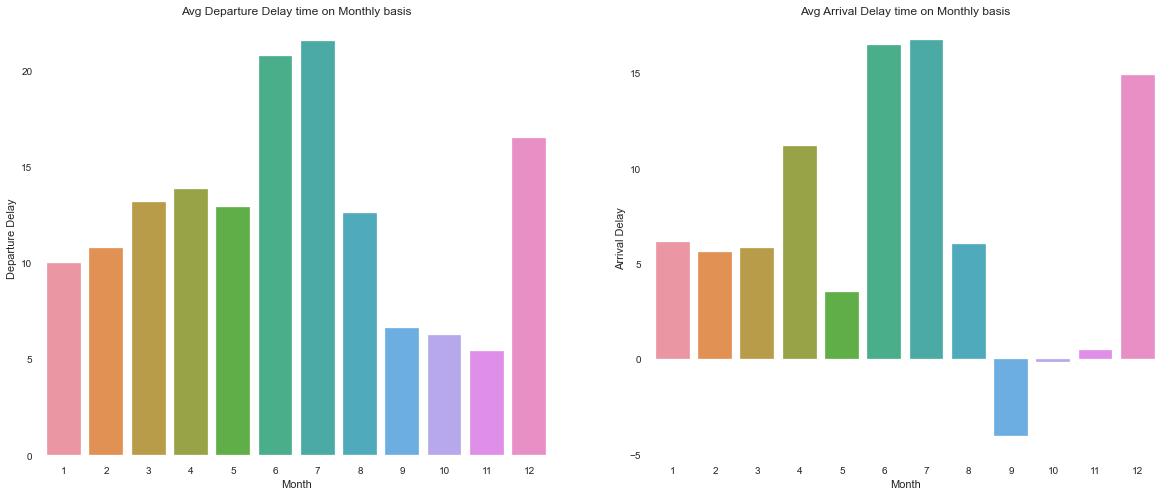

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,8))

monthly_dep_delay = NYC_Flight_data.groupby(['month'], as_index=False).agg({'dep_delay':'mean'})
sns.catplot(x='month', y='dep_delay',data=monthly_dep_delay, kind='bar',ax=ax[0])
ax[0].set_title("Avg Departure Delay time on Monthly basis") 
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Departure Delay')
plt.close()

monthly_arr_delay = NYC_Flight_data.groupby(['month'], as_index=False).agg({'arr_delay':'mean'})
sns.catplot(x='month', y='arr_delay',data=monthly_arr_delay, kind='bar',ax=ax[1])
ax[1].set_title("Avg Arrival Delay time on Monthly basis") 
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Arrival Delay')
plt.close()

plt.show()

- <span style="color:DarkGreen"> **Departures Delays are happening more in July followed by June & Dec**
- <span style="color:DarkGreen"> **As Arrival Delays are mainly dependent on Departure time, almost same statistics are reported for Arrival Delays**

<span style="color:DarkGreen"> - <div align="center"> **Carrier - Month - Departure Delay**

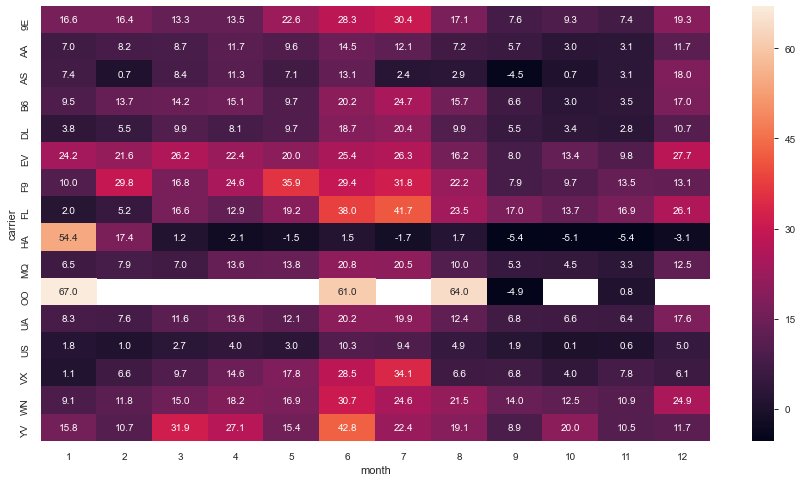

In [17]:
carrier_month_dep_delay = NYC_Flight_data[['carrier','dep_delay','speed','month']]
plt.figure(figsize=(15,8))
cmdd_heatmap = pd.pivot_table(carrier_month_dep_delay,values='dep_delay', aggfunc='mean', index='carrier',columns='month')
sns.heatmap(cmdd_heatmap,annot=True, fmt=".1f")
plt.show()

- <span style="color:DarkGreen"> **Departure Delay happening in June,July & Dec**

<span style="color:DarkGreen"> - <div align="center"> **Departure & Arrival Delay by carrier**

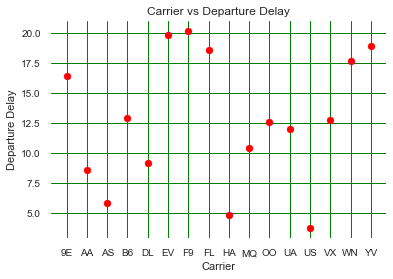

In [18]:
monthly_dep_delay = NYC_Flight_data.groupby(['carrier'], as_index=False).agg({'dep_delay':'mean'})
plt.scatter(monthly_dep_delay.carrier,monthly_dep_delay.dep_delay, color='red')
plt.grid(True, color='g', linewidth=1)
plt.title('Carrier vs Departure Delay')
plt.xlabel('Carrier')
plt.ylabel('Departure Delay')
plt.show()

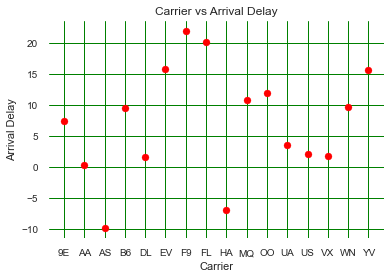

In [19]:
monthly_arr_delay = NYC_Flight_data.groupby(['carrier'], as_index=False).agg({'arr_delay':'mean'})
plt.scatter(monthly_arr_delay.carrier,monthly_arr_delay.arr_delay, color='red')
plt.grid(True, color='g', linewidth=1)
plt.title('Carrier vs Arrival Delay')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay')
plt.show()

- <span style="color:DarkGreen"> **Carrier F9,EV,FL & YU used to have more Departure Delay and same with Arrival Delays**

<span style="color:DarkGreen"> - <div align="center"> **Departure Delay by Origin**

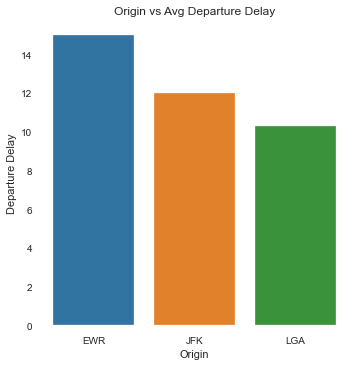

In [20]:
monthly_dep_delay = NYC_Flight_data.groupby(['origin'], as_index=False).agg({'dep_delay':'mean'})
sns.catplot(x='origin', y='dep_delay',data=monthly_dep_delay, kind='bar')
plt.title("Origin vs Avg Departure Delay") 
plt.xlabel('Origin')
plt.ylabel('Departure Delay')
plt.show()

 - <span style="color:DarkGreen"> **EWR airport having more Departure Delays and this airport is having highest Departures too.** 

<span style="color:DarkGreen"> - <div align="center"> **Skeweness in Dep & Arrival delay timings**

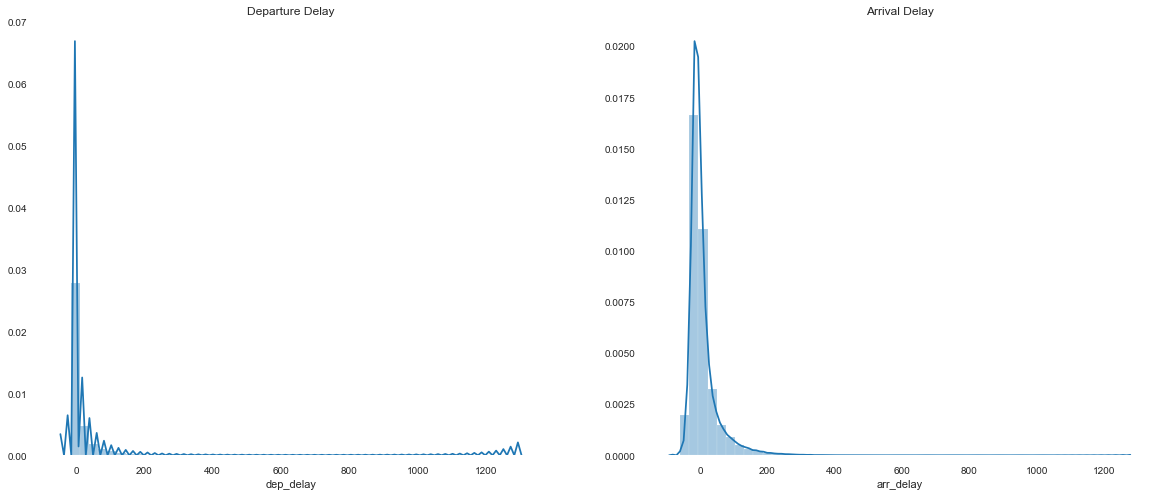

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.distplot(NYC_Flight_data['dep_delay'],ax=ax[0])
ax[0].set_title("Departure Delay") 

sns.distplot(NYC_Flight_data['arr_delay'],ax=ax[1])
ax[1].set_title("Arrival Delay") 

plt.show()

- <span style="color:DarkGreen"> **Positive Skeweness in both Delay timings**

In [22]:
print("Departure - Skewness: %2.1f%%" % NYC_Flight_data['dep_delay'].skew())
print("Arrival - Skewness: %2.1f%%" % NYC_Flight_data['arr_delay'].skew())

Departure - Skewness: 4.8%
Arrival - Skewness: 3.7%


<span style="color:DarkGreen"> - <div align="center"> **Best Airport in tearms of early Departure**

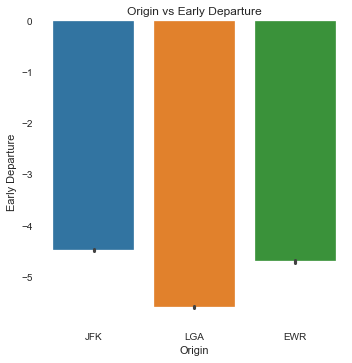

In [23]:
origin_departure = NYC_Flight_data[['origin','dep_delay']]
early_departure = origin_departure[origin_departure['dep_delay'] <0];

sns.catplot(x='origin', y='dep_delay',data=early_departure, kind='bar')

plt.title('Origin vs Early Departure') 
plt.xlabel('Origin')
plt.ylabel('Early Departure')
plt.show()

- <span style="color:DarkGreen"> **LGA is the best airport in terms of early Departure and very slight difference between EWR &JKF**

<span style="color:DarkGreen"> - <div align="center"> **Carriers Performance based on departure & Arrival timings**

In [49]:
#1 = Not Good
#2 = Good
#3 = Extra Ordinary

carrier_info = NYC_Flight_data[['origin','dep_delay','arr_delay','carrier']]
carrier_info['status'] = 0
carrier_info.loc[(carrier_info['dep_delay'] == 0) & (carrier_info['arr_delay'] == 0), 'status']  = 2
carrier_info.loc[(carrier_info['dep_delay'] == 0) & (carrier_info['arr_delay'] > 0), 'status']  = 1
carrier_info.loc[(carrier_info['dep_delay'] == 0) & (carrier_info['arr_delay'] < 0), 'status']  = 3
carrier_info.loc[(carrier_info['dep_delay'] > 0) & (carrier_info['arr_delay'] == 0), 'status']  = 2
carrier_info.loc[(carrier_info['dep_delay'] > 0) & (carrier_info['arr_delay'] > 0), 'status']  = 2
carrier_info.loc[(carrier_info['dep_delay'] > 0) & (carrier_info['arr_delay'] < 0), 'status']  = 3
carrier_info.loc[(carrier_info['dep_delay'] < 0) & (carrier_info['arr_delay'] == 0), 'status']  = 2
carrier_info.loc[(carrier_info['dep_delay'] < 0) & (carrier_info['arr_delay'] > 0), 'status']  = 1
carrier_info.loc[(carrier_info['dep_delay'] < 0) & (carrier_info['arr_delay'] < 0), 'status']  = 2
 
carrier_info.head(20)

,origin,dep_delay,arr_delay,carrier,status
0,EWR,2.0,11.0,UA,2
1,LGA,4.0,20.0,UA,2
2,JFK,2.0,33.0,AA,2
3,JFK,-1.0,-18.0,B6,2
4,LGA,-6.0,-25.0,DL,2
5,EWR,-4.0,12.0,UA,1
6,EWR,-5.0,19.0,B6,1
7,LGA,-3.0,-14.0,EV,2
8,JFK,-3.0,-8.0,B6,2
9,LGA,-2.0,8.0,AA,1


In [50]:
carrier_status = carrier_info.groupby(['carrier'], as_index=False).agg({'status':'mean'})
carrier_status['status'] = carrier_status['status'].round(decimals=1)
carrier_status.head(20)

,carrier,status
0,9E,2.0
1,AA,2.0
2,AS,2.1
3,B6,2.0
4,DL,2.0
5,EV,2.0
6,F9,1.9
7,FL,1.9
8,HA,1.9
9,MQ,1.9


Text(0, 0.5, 'Status')

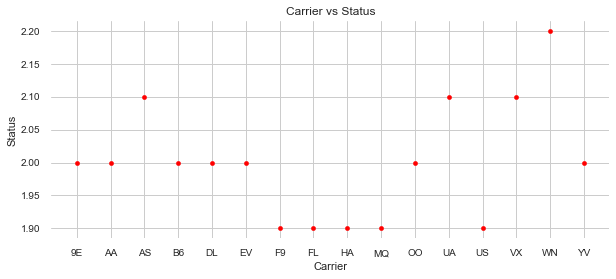

In [51]:
carrier_status.plot(kind='scatter', x='carrier', y='status', figsize=(10, 4), color='red', grid=True)

plt.title("Carrier vs Status") 
plt.xlabel('Carrier')
plt.ylabel('Status')

- <span style="color:DarkGreen"> **Created new field status(Bad,  Good & Extra Ordinary) which decides the Carrier performance** 
- <span style="color:DarkGreen"> *Dataset doesn't provide information on reasons for delay, so in this case Carrier Performance is decided based on Departure & Arrival timings
- <span style="color:Dark Green"> **Based on Scatter Plot, below are the observations**
  <p> <span style="color:DarkGreen">  </p>
  <pre><code> <span style="color:DarkGreen">1. WN are having Extra Ordinary Performance followed by AS,UA & VX 
  <span style="color:DarkGreen"> 2. 9E,AA,B6,DL,EV,OO,YV are Good Performers
  <span style="color:DarkGreen"> 3. F9,FL,HA,MQ,US are not good Performers
     

<span style="color:DarkGreen"> - <div align="center"> **Understanding Extra Ordinary & Good Performers**

In [52]:
top_10_carrier_perf = carrier_info[['dep_delay','arr_delay','carrier','status']]
top_10_carrier_perf = top_10_carrier_perf[(top_10_carrier_perf['status'] == 2) | (top_10_carrier_perf['status'] == 3)]
top_10_carrier_perf

,dep_delay,arr_delay,carrier,status
0,2.0,11.0,UA,2
1,4.0,20.0,UA,2
2,2.0,33.0,AA,2
3,-1.0,-18.0,B6,2
4,-6.0,-25.0,DL,2
...,...,...,...,...
336765,-5.0,-17.0,B6,2
336766,-10.0,-20.0,B6,2
336767,-5.0,-16.0,B6,2
336768,12.0,1.0,B6,2


In [53]:
top_10_carrier_perf = top_10_carrier_perf[(top_10_carrier_perf['dep_delay'] <= 0) & (top_10_carrier_perf['arr_delay'] > 0)]
top_10_carrier_perf

,dep_delay,arr_delay,carrier,status


In [54]:
carrier_info

,origin,dep_delay,arr_delay,carrier,status
0,EWR,2.0,11.0,UA,2
1,LGA,4.0,20.0,UA,2
2,JFK,2.0,33.0,AA,2
3,JFK,-1.0,-18.0,B6,2
4,LGA,-6.0,-25.0,DL,2
...,...,...,...,...,...
336765,JFK,-5.0,-17.0,B6,2
336766,JFK,-10.0,-20.0,B6,2
336767,JFK,-5.0,-16.0,B6,2
336768,JFK,12.0,1.0,B6,2


In [55]:
286645 / 327346

0.8756636708559139

<span style="color:DarkGreen"> - <div align="center"> **Carrier Performance based on Speed**

In [31]:
#Sort data based on speed
fast_flight = NYC_Flight_data[['carrier','flight','distance','air_time','speed']]
fast_flight = fast_flight.sort_values(by='speed', ascending = False)
fast_flight.head()

,carrier,flight,distance,air_time,speed
216447,DL,1499,762,65.0,703.384615
251999,EV,4667,1008,93.0,650.322581
205388,EV,4292,594,55.0,648.000000
157516,EV,3805,748,70.0,641.142857
10223,DL,1902,1035,105.0,591.428571


In [32]:
#Get carriers in sorted order based on Avg speed
carrier_performance = fast_flight.groupby(['carrier'], as_index=False).agg({'speed':'mean'})
carrier_performance = carrier_performance.sort_values(by='speed', ascending = False)
carrier_performance.head(20)

,carrier,speed
8,HA,480.357719
13,VX,446.174935
2,AS,443.678889
6,F9,425.172111
11,UA,420.883774
4,DL,418.462807
1,AA,417.472739
14,WN,400.532009
3,B6,399.971468
7,FL,394.358094


Text(0, 0.5, 'Speed')

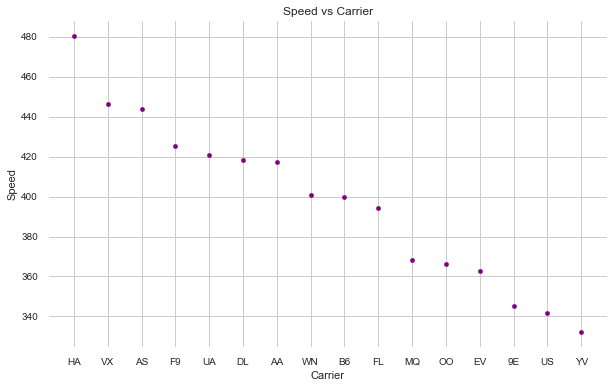

In [33]:
carrier_performance.plot(kind='scatter', x='carrier', y='speed', figsize=(10, 6), color='purple', grid=True)

plt.title("Speed vs Carrier") 
plt.xlabel('Carrier')
plt.ylabel('Speed')

In [34]:
#Get flights in sorted order based on Avg speed
carrier_performance = fast_flight.groupby(['carrier','flight'], as_index=False).agg({'speed':'mean'})
carrier_performance = carrier_performance.sort_values(by='speed', ascending = False)
carrier_performance.head(20)

,carrier,flight,speed
1184,DL,412,503.338294
1126,DL,1,503.324293
1215,DL,448,502.455776
2590,EV,5479,502.048193
1157,DL,329,499.050123
1719,DL,2591,499.006688
1619,DL,2275,498.554628
1668,DL,2444,497.095425
950,B6,699,496.859267
4376,US,88,496.046512


- <span style="color:DarkGreen"> **Average speed on Carriers are in this order from high to low - HA,VX,AS,F9,UA,DL,AA,WN,B6,FL,MQ,OO,EV,9E,UA,YV.**

<span style="color:DarkGreen"> - <div align="center"> **Carrier - Month - Speed**

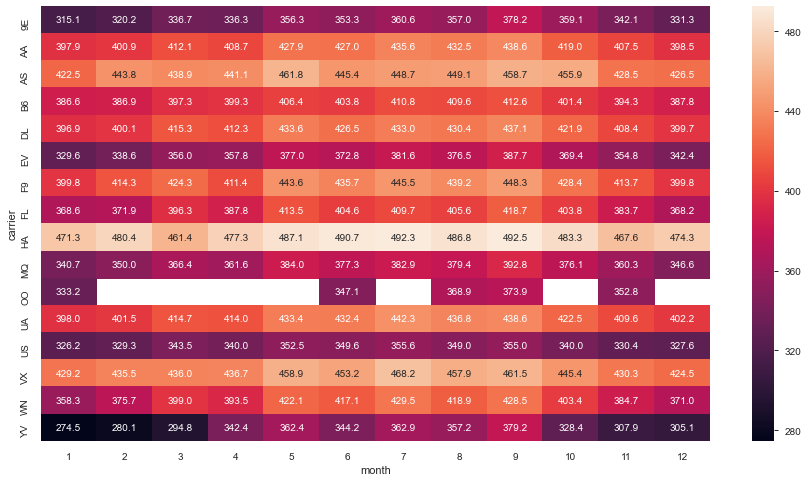

In [35]:
carrier_month_speed = NYC_Flight_data[['carrier','month_name','speed','month']]
#carrier_month_speed
plt.figure(figsize=(15,8))
cms_heatmap = pd.pivot_table(carrier_month_speed,values='speed', aggfunc='mean', index='carrier',columns='month')
sns.heatmap(cms_heatmap,annot=True, fmt=".1f")
plt.show()

- <span style="color:DarkGreen"> **From above Heat Map, we can clearly understand that the Avg speed is high in the months of May to Aug.**
- <span style="color:DarkGreen"> **HA,VS & AX having highest AVG speed**

<span style="color:DarkGreen"> - <div align="center"> **Destination - Arrival Delays**

In [36]:
total_dest = NYC_Flight_data[['dest']]
total_dest['total_count'] = total_dest.groupby('dest')['dest'].transform('count')
total_dest.drop_duplicates(subset=None, keep='first', inplace=True)
total_dest_sorted = total_dest.sort_values(by='total_count',ascending = False)
total_dest_sorted.head()

,dest,total_count
4,ATL,16837
5,ORD,16566
12,LAX,16026
15,BOS,15022
8,MCO,13967


In [37]:
delay_dest = NYC_Flight_data[['dest','dep_delay','arr_delay']]
delay_dest = delay_dest[(delay_dest['dep_delay'] <=0) & (delay_dest['arr_delay'] > 0) ];
delay_dest.drop(axis = 1, columns = ['dep_delay','arr_delay'],inplace = True)
delay_dest['delay_count'] = delay_dest.groupby('dest')['dest'].transform('count')
delay_dest.drop_duplicates(subset=None, keep='first',inplace=True )
delay_dest_sorted = delay_dest.sort_values(by='delay_count',ascending = False)
delay_dest_sorted.head()

,dest,delay_count
18,ATL,3147
111,CLT,2429
12,LAX,2145
75,MCO,1799
5,ORD,1691


In [38]:
data_frames = [total_dest_sorted,delay_dest_sorted]
dest_delay_ratio = pd.merge(total_dest_sorted,delay_dest_sorted,on= 'dest')
dest_delay_ratio['ratio'] = (dest_delay_ratio['delay_count'] / dest_delay_ratio['total_count']) * 100
dest_delay_ratio = dest_delay_ratio.sort_values(by='ratio',ascending = False)
dest_delay_ratio_top = dest_delay_ratio.head(15)
dest_delay_ratio_top

,dest,total_count,delay_count,ratio
97,PSP,18,5,27.777778
56,XNA,992,238,23.991935
98,EYW,17,4,23.529412
0,ATL,16837,3147,18.690978
5,CLT,13674,2429,17.763639
76,PSE,358,62,17.318436
95,BZN,35,6,17.142857
49,PHL,1541,260,16.872161
85,AVL,261,44,16.858238
9,DCA,9111,1499,16.452640


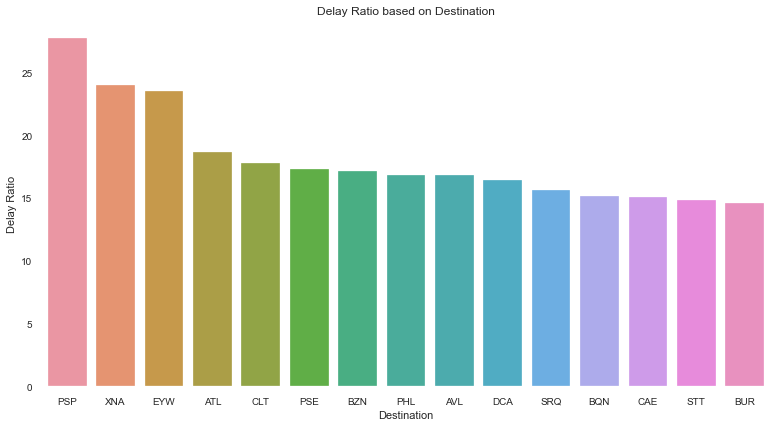

In [56]:
sns.catplot(x='dest', y='ratio',data=dest_delay_ratio_top,kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.title("Delay Ratio based on Destination") 
plt.xlabel('Destination')
plt.ylabel('Delay Ratio')
plt.show()

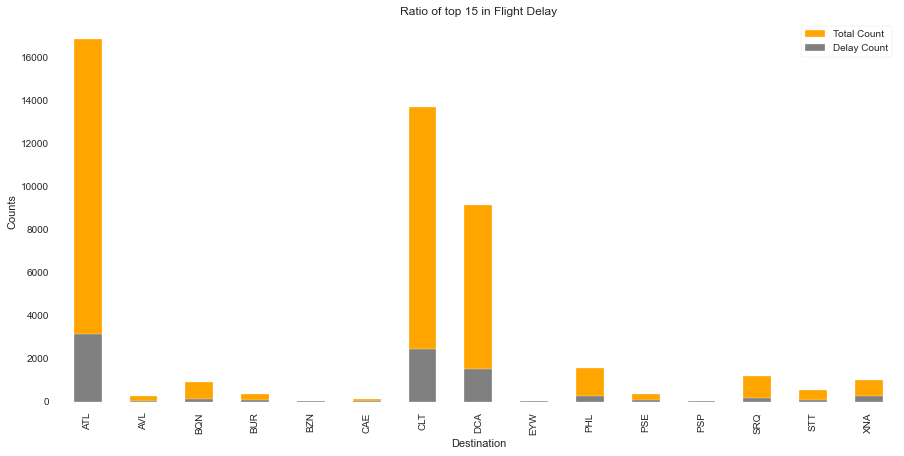

In [40]:
bins = np.arange(0,700,250)

dest_delay_ratio_top.groupby(['dest'])['total_count'].mean().plot(kind='bar', figsize=(15, 7), color='orange')
dest_delay_ratio_top.groupby(['dest'])['delay_count'].mean().plot(kind='bar', figsize=(15, 7), color='grey',yticks=np.arange(0, 17000,2000))
plt.xlabel('Destination')
plt.ylabel('Counts')
plt.title('Ratio of top 15 in Flight Delay')
plt.legend(labels=('Total Count', 'Delay Count'))

- <span style="color:DarkGreen"> **Considering Flights with no Departure delay, the destinations are having PSP, XNA, EYW, ATL, CLT, PSE, BZN, PHL, AVL, DCA more than 15% delays.**

<span style="color:DarkGreen"> - <div align="center"> **Understanding Destination having more than 15% Delays**

In [41]:
BDL_DEST = NYC_Flight_data[['carrier','origin','dest','air_time','dep_delay','arr_delay','distance','month']]
BDL_DEST = BDL_DEST[(BDL_DEST['dest'] =='PSP') | (BDL_DEST['dest'] =='XNA') | (BDL_DEST['dest'] =='EYW') | (BDL_DEST['dest'] =='ALT') | (BDL_DEST['dest'] =='CLT') | (BDL_DEST['dest'] =='PSE') | (BDL_DEST['dest'] =='BZN') | (BDL_DEST['dest'] =='PHL') | (BDL_DEST['dest'] =='AVL') | (BDL_DEST['dest'] =='DCA')]
BDL_DEST.count()

carrier      26007
origin       26007
dest         26007
air_time     26007
dep_delay    26007
arr_delay    26007
distance     26007
month        26007
dtype: int64

In [42]:
BDL_DEST = BDL_DEST[(BDL_DEST['dep_delay'] > 0 )]
BDL_DEST.count()

carrier      8262
origin       8262
dest         8262
air_time     8262
dep_delay    8262
arr_delay    8262
distance     8262
month        8262
dtype: int64

In [43]:
BDL_DEST['carrier'].unique()

array(['MQ', 'US', 'EV', 'B6', '9E', 'UA', 'DL', 'VX', 'YV'], dtype=object)

In [44]:
BDL_DEST['origin'].value_counts()

LGA    3274
EWR    2505
JFK    2483
Name: origin, dtype: int64

In [45]:
BDL_DEST['carrier_count'] = BDL_DEST.groupby('carrier')['carrier'].transform('count')
BDL_DEST

,carrier,origin,dest,air_time,dep_delay,arr_delay,distance,month,carrier_count
119,MQ,LGA,CLT,118.0,101.0,137.0,544,1,1301
390,MQ,LGA,CLT,98.0,6.0,27.0,544,1,1301
425,US,LGA,CLT,96.0,3.0,4.0,544,1,3493
458,EV,EWR,CLT,102.0,8.0,11.0,529,1,2094
482,EV,EWR,DCA,45.0,38.0,34.0,199,1,2094
...,...,...,...,...,...,...,...,...,...
336460,EV,EWR,AVL,81.0,3.0,4.0,583,9,2094
336504,EV,LGA,CLT,78.0,46.0,20.0,544,9,2094
336534,US,EWR,CLT,71.0,15.0,-1.0,529,9,3493
336692,US,LGA,DCA,41.0,13.0,13.0,214,9,3493


Text(0.5, 1.0, 'Carrier and Delay timings')

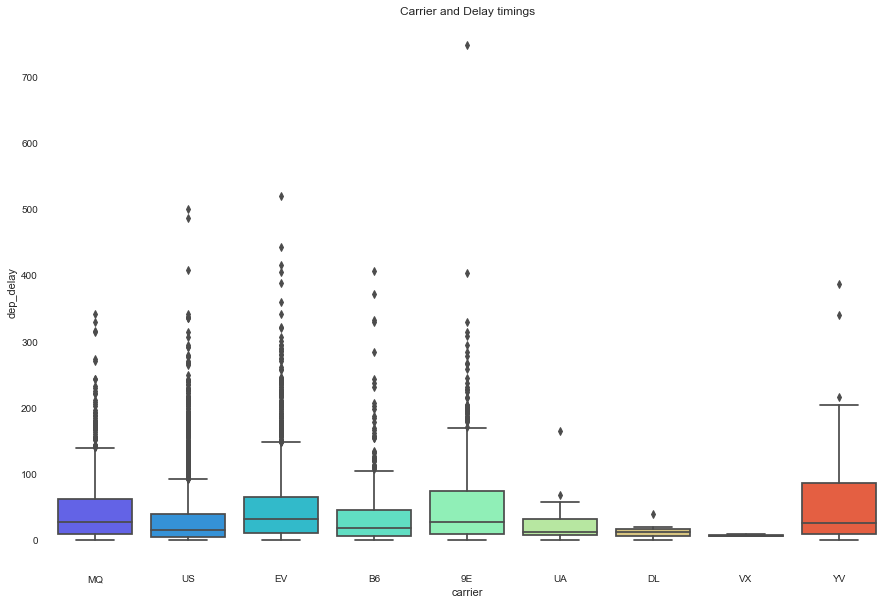

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(data=BDL_DEST, x='carrier', y='dep_delay', palette='rainbow')
plt.title('Carrier and Delay timings')

- <span style="color:DarkGreen"> **1. From above plots, we can understand that MQ,B6,9E,UA,YU having more delays**
- <span style="color:DarkGreen"> **2. Avg speed of these carriers are comparatively low**

<span style="color:DarkGreen"> - <div align="center"> **Pair Plot for Time & Speed related fields.**

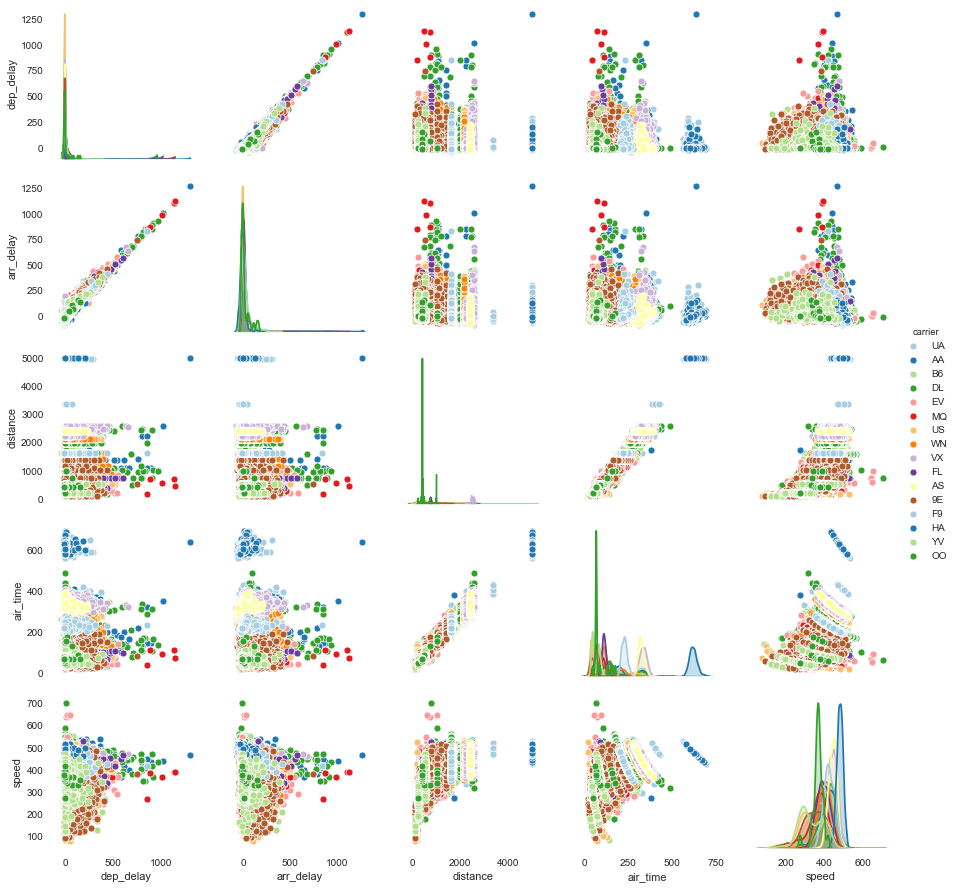

In [38]:
NYC_Flight_data_pairplot = sns.pairplot(NYC_Flight_data,
                            vars=['dep_delay','arr_delay','distance','air_time','speed'], hue='carrier', palette="Paired")
plt.show(NYC_Flight_data_pairplot)

<a id=section6></a> 
### 6. Conclusions

- **This data mainly focus on year 2013 travel details of Flights like Origin, Destination, Travel Date & Timings and Distance.**
- **Below are my observations based on statistics done**

  **Origin:**
    1. **EWR** is the **Busiest Airport** based on departures and this airport having more **Departure Delays** too.
    2. **LGA** is the **best airport** in terms of **early Departure** and very slight difference between EWR &JKF

  **Month:**
    1. **Highest Delays** are happening on month of **June,July & Dec and less delays** are happening on **Sept,Oct & Nov.**
    2. **Feb** month having **less travels** when compared to other months

  **Destinations:**
    1. **ATL,ORD,LAX,BOS & MCO are top 5 destination** from NYC airports
    2. Considering Flights with no Departure delay, the destinations are having PSP, XNA, EYW, ATL, CLT, PSE, BZN, PHL, AVL, DCA more than 15% delays.
    3. From Statistics we can understand that MQ,B6,9E,UA,YU having more delays for above destinations.
    4. Avg speed of these carriers are comparatively low.

  **Carriers:**
    1. Carriers **UA,B6,EV & DL holding 60%** of travels and UA stood in the top.
    2. Carrier **F9,EV,FL & YU used to have more Departure Delay** and same with Arrival Delays.
    3. Carrier **VX,AS & UA are performing good in adjusting the travel time** based on departure Delays.

    - Dataset doesn't provide information on reasons for delay, so in this case **Carrier Performance is decided based on Departure & Arrival timings** - status(Bad, Good & Extra Ordinary).

    1. **WN** are having **Extra Ordinary Performance** followed by AS,UA & VX 
    2. **9E,AA,B6,DL,EV,OO,YV** are Good Performers
    3. **F9,FL,HA,MQ,US** are not good Performers
    4. Good & Extra Ordinary performars hold 80% market.

  **Speed:**
    1. Average speed of Carriers are in this order from high to low - HA,VX,AS,F9,UA,DL,AA,WN,B6,FL,MQ,OO,EV,9E,US,YV.
    2. Avg speed is **high** in the months of **May to Aug**.




<a id=section7></a> 
### 7. Actionable Insights

1. Highest delays are happening in the month of May,June,July,August & December and this maybe due to Summer holiday & festival season in USA. So we need to put extra staff in the airports for faster check in, security checks, Immigiration process etc.

2. Feb month having less travels when compared to other months, so if Companies can provide offers/discounts in this month, Chances are high that passenger may get attracted to travel.

3. Out of 105 destinations, almost 10 destinations having 15% delays and only MQ,B6,9E,UA,YU carriers providing services for these destinations - Based on the analysis these carriers having comparatively less avg speed. So if these companies allow High speed, may be this issue gets resolved.

4. EWR is the busiest airport and having high departure delays too, to overcome this, we need to have more staff recruited to control the passenger traffic,may be spreading the flights across the clock,introducing new automated machines like automatic baggage check in etc.

5. HA & F9 carriers having good avg speed limits, but the performance is not good when covering the travel time. So we need to check on all flights of these companies on speed limits which reflect the delay time and Pilots training needed.

6. FL,MQ & US are performing not good in covering the delay time and speed limits are also very low. If companies are allowing more speed limits irrespective of fuel consumption, Delay time can be reduced.
